# Glossary

- <a href='#intro'><b>1 Introduction</b></a>
- <a href='#importing'><b>2 Importing and installing dependencies</b></a>
- <a href='#game_data'><b>3 Game Data</b></a>
    - <a href='#types'><b>3.1 Checking column types</b></a>
        - <a href='#memory_usage'> 3.1.1 Changing column types for less memory usage</a>
    - <a href='#null'><b>3.2 Checking for Null values</b></a>
         - <a href='#null_needs'>3.2.1 Checking whether or not we need the columns with missing values</a>
         - <a href='#null_drop'>3.2.2 Dropping unnecessary columns</a>
    - <a href='#scatter_plot'><b>3.3 Plotting the games of the season</b></a>
- <a href='#video_footage_injury'><b>4 Video Footage Injury</b></a>
    - <a href='#video_footage_injury_types'><b>4.1 Checking column types</b></a>
    - <a href='#video_footage_injury_null'><b>4.2 Checking for Null values</b></a>
    - <a href='#video_footage_injury_season'><b>4.3 Plotting concussions</b></a>
        - <a href='#video_footage_injury_season'>4.3.1 Concussions by season and year</a>
        - <a href='#video_footage_injury_week'>4.3.2 Concussions by week and quarter</a>

# <a id='intro'><b>1 Introduction:</b></a>

The National Football League is America's most popular sports league, comprised of 32 franchises that compete each year to win the Super Bowl, the world's biggest annual sporting event. Founded in 1920, the NFL developed the model for the successful modern sports league, including national and international distribution, extensive revenue sharing, competitive excellence, and strong franchises across the country.

The NFL is committed to advancing progress in the diagnosis, prevention and treatment of sports-related injuries. The NFL's ongoing health and safety efforts include support for independent medical research and engineering advancements and a commitment to look at anything and everything to protect players and make the game safer, including enhancements to medical protocols and improvements to how our game is taught and played.

As more is learned, the league evaluates and changes rules to evolve the game and try to improve protections for players. Since 2002 alone, the NFL has made 50 rules changes intended to eliminate potentially dangerous tactics and reduce the risk of injuries.

For more information about the NFL's health and safety efforts, please visit www.PlaySmartPlaySafe.com.

# <a id='importing'><b>2 Importing and installing dependencies:</b></a>

In [98]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

print('All dependencies installed')

All dependencies installed


# <a id='game_data'><b>3 Game Data:</b></a>

In [99]:
game_data = pd.read_csv('../input/game_data.csv', parse_dates=True)
print(game_data.shape)
game_data.head()

(666, 18)


,GameKey,Season_Year,Season_Type,Week,Game_Date,Game_Day,Game_Site,Start_Time,Home_Team,HomeTeamCode,Visit_Team,VisitTeamCode,Stadium,StadiumType,Turf,GameWeather,Temperature,OutdoorWeather
0,1,2016,Pre,1,2016-08-07 00:00:00.000,Sunday,Indianapolis,20:00,Indianapolis Colts,IND,Green Bay Packers,GB,Tom Benson Hall of Fame Stadium,Outdoor,Turf,NaN,NaN,NaN
1,2,2016,Pre,2,2016-08-13 00:00:00.000,Saturday,Los Angeles,17:00,Los Angeles Rams,LA,Dallas Cowboys,DAL,Los Angeles Memorial Coliseum,Outdoor,Grass,Sunny,79.0,Sunny
2,3,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Baltimore,19:30,Baltimore Ravens,BLT,Carolina Panthers,CAR,M&T Bank Stadium,Outdoor,Natural Grass,Party Cloudy,94.0,Partly Cloudy
3,4,2016,Pre,2,2016-08-12 00:00:00.000,Friday,Green Bay,19:00,Green Bay Packers,GB,Cleveland Browns,CLV,Lambeau Field,Outdoor,DD GrassMaster,NaN,73.0,NaN
4,5,2016,Pre,2,2016-08-11 00:00:00.000,Thursday,Chicago,19:00,Chicago Bears,CHI,Denver Broncos,DEN,Soldier Field,Outdoor,Grass,"Partly Cloudy, Chance of Rain 80%",88.0,NaN


## <a id='types'><b>3.1 Checking column types</b></a>

In [100]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 18 columns):
GameKey           666 non-null int64
Season_Year       666 non-null int64
Season_Type       666 non-null object
Week              666 non-null int64
Game_Date         666 non-null object
Game_Day          666 non-null object
Game_Site         666 non-null object
Start_Time        666 non-null object
Home_Team         666 non-null object
HomeTeamCode      666 non-null object
Visit_Team        666 non-null object
VisitTeamCode     666 non-null object
Stadium           666 non-null object
StadiumType       628 non-null object
Turf              665 non-null object
GameWeather       568 non-null object
Temperature       600 non-null float64
OutdoorWeather    412 non-null object
dtypes: float64(1), int64(3), object(14)
memory usage: 93.7+ KB


### <a id='memory_usage'> 3.1.1 Changing column types for less memory usage</a>

In [101]:
category_columns = ['Season_Type', 'StadiumType', 'Turf']
float_columns = ['Temperature']

game_data[category_columns] = game_data[category_columns].astype('category')
game_data[float_columns] = game_data[float_columns].astype(float)
date = pd.to_datetime(game_data['Game_Date'].str.split(expand=True)[0], format='%Y-%m-%d')

In [102]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 18 columns):
GameKey           666 non-null int64
Season_Year       666 non-null int64
Season_Type       666 non-null category
Week              666 non-null int64
Game_Date         666 non-null object
Game_Day          666 non-null object
Game_Site         666 non-null object
Start_Time        666 non-null object
Home_Team         666 non-null object
HomeTeamCode      666 non-null object
Visit_Team        666 non-null object
VisitTeamCode     666 non-null object
Stadium           666 non-null object
StadiumType       628 non-null category
Turf              665 non-null category
GameWeather       568 non-null object
Temperature       600 non-null float64
OutdoorWeather    412 non-null object
dtypes: category(3), float64(1), int64(3), object(11)
memory usage: 82.5+ KB


## <a id='null'><b>3.2 Checking for Null values</b></a>

In [103]:
np.sum(game_data.isnull())

GameKey             0
Season_Year         0
Season_Type         0
Week                0
Game_Date           0
Game_Day            0
Game_Site           0
Start_Time          0
Home_Team           0
HomeTeamCode        0
Visit_Team          0
VisitTeamCode       0
Stadium             0
StadiumType        38
Turf                1
GameWeather        98
Temperature        66
OutdoorWeather    254
dtype: int64

### <a id='null_needs'>3.2.1 Checking whether or not we need the columns with missing values</a>

In [104]:
stadium_type = game_data['StadiumType'].value_counts()
turf = game_data['Turf'].value_counts()
game_weather = game_data['GameWeather'].value_counts()
temperature = game_data['Temperature'].value_counts()
outdoor_weather = game_data['OutdoorWeather'].value_counts

print(stadium_type, '\n', '-'*50, '\n', turf, '\n', '-'*50, '\n', game_weather, '\n', '-'*50, '\n', temperature,  '\n', '-'*50, '\n', outdoor_weather)

Outdoor                         348
Outdoors                         81
Indoors                          46
Indoor                           42
Retractable Roof                 21
Dome                             21
Open                             20
Retr. Roof - Closed               9
outdoor                           4
Retr. Roof-Closed                 4
Retr. Roof - Open                 3
Dome, closed                      2
Domed, closed                     2
Indoor, non-retractable roof      2
Indoors (Domed)                   2
Closed Dome                       2
Retr. Roof-Open                   2
Outdoors                          2
Turf                              1
Indoor, Non-Retractable Dome      1
Retr. roof - closed               1
Retr. Roof Closed                 1
Heinz Field                       1
Outside                           1
Indoor, Fixed Roof                1
Indoor, Open Roof                 1
Oudoor                            1
Indoor, Roof Closed         

stadium_type = most of the values are repeated or labelled differently but mean the same. Most stadiums also are outdoors with a few with retractable roofs. The few that are missing can be searched easily. 
turf = same with stadium_type, most values are the same but labelled differently and can be searched easily. 
game_weather = around 15% of the values are missing in this column. This can be searched but will be more time-consuming. 
temperature = around 10% of the values are missing in this column, which seems a little weird since game_weather has more missing values. 
outdoor_weather = around 38% of the data is missing and may potentially not have a very big impact on the analysis of data.

<a id='null_drop'>3.2.2 Dropping unnecessary columns</a>

In [105]:
game_data = game_data.drop(columns=['OutdoorWeather', 'GameWeather'], axis=1)
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 16 columns):
GameKey          666 non-null int64
Season_Year      666 non-null int64
Season_Type      666 non-null category
Week             666 non-null int64
Game_Date        666 non-null object
Game_Day         666 non-null object
Game_Site        666 non-null object
Start_Time       666 non-null object
Home_Team        666 non-null object
HomeTeamCode     666 non-null object
Visit_Team       666 non-null object
VisitTeamCode    666 non-null object
Stadium          666 non-null object
StadiumType      628 non-null category
Turf             665 non-null category
Temperature      600 non-null float64
dtypes: category(3), float64(1), int64(3), object(9)
memory usage: 72.1+ KB


After dropping 2 columns and changing their types, the memory usage went down by 21+ KB

## <a id='scatter_plot'><b>3.3 Plotting the games of the season</b></a>

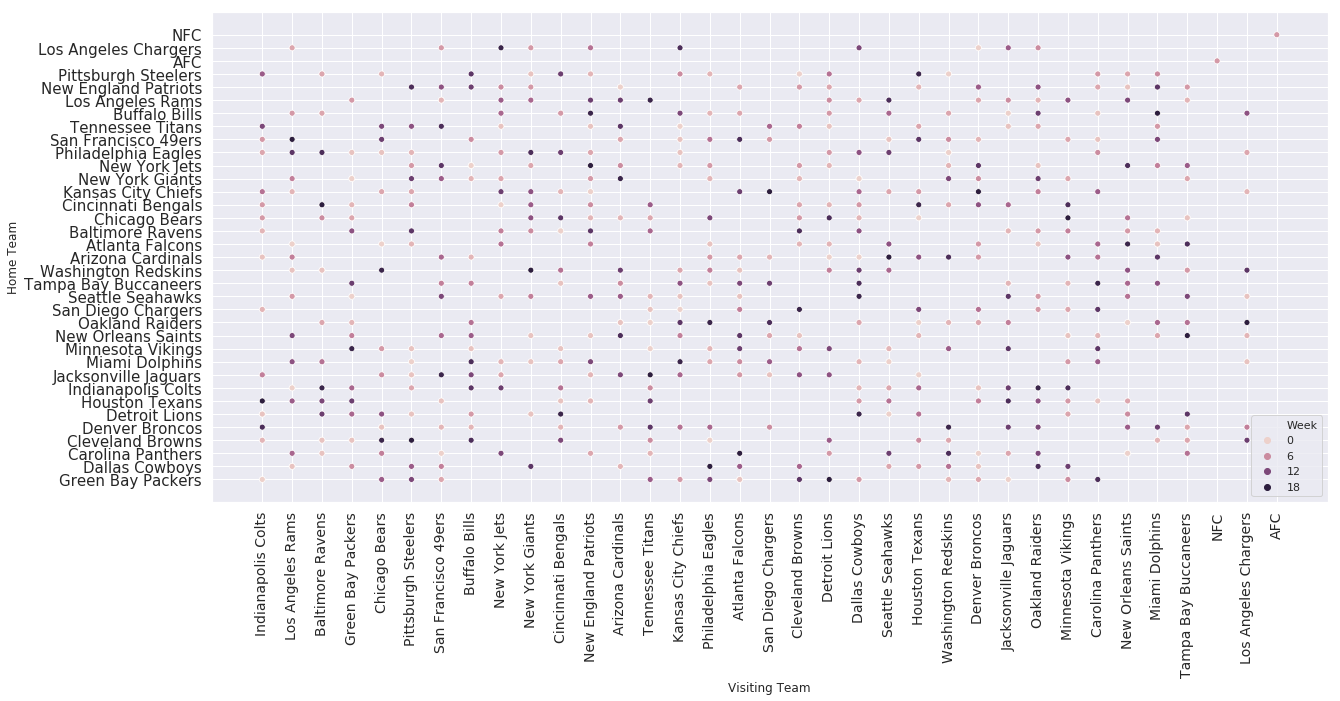

In [106]:
plt.figure(figsize=(20, 9))

_ = sns.scatterplot(x='Home_Team', y='Visit_Team', hue='Week',data=game_data)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Visiting Team')
plt.ylabel('Home Team')

plt.show()

It seems that the dataset included for NFC and AFC which are divisions and not teams.

# <a id='video_footage_injury'><b>4 Video Footage Injury:</b></a>

In [107]:
video_footage_injury = pd.read_csv('../input/video_footage-injury.csv', parse_dates=True)
print(game_data.shape)
video_footage_injury.head()

(666, 16)


,season,Type,Week,Home_team,Visit_Team,Qtr,PlayDescription,gamekey,playid,PREVIEW LINK (5000K)
0,2016,Pre,2,Chicago Bears,Denver Broncos,3,(3:44) (Punt formation) P.O'Donnell punts 58 y...,5,3129,http://a.video.nfl.com//films/vodzilla/153233/...
1,2016,Pre,3,Tennessee Titans,Carolina Panthers,3,(5:52) (Punt formation) K.Redfern punts 36 yar...,21,2587,http://a.video.nfl.com//films/vodzilla/153234/...
2,2016,Pre,3,Washington Redskins,New York Jets,1,"(4:46) L.Edwards punts 51 yards to WAS 27, Cen...",29,538,http://a.video.nfl.com//films/vodzilla/153235/...
3,2016,Pre,4,New York Jets,New York Giants,2,"(8:29) B.Wing punts 44 yards to NYJ 10, Center...",45,1212,http://a.video.nfl.com//films/vodzilla/153236/...
4,2016,Pre,5,Detroit Lions,Buffalo Bills,1,"(:38) C.Schmidt punts 46 yards to DET 8, Cente...",60,905,http://a.video.nfl.com//films/vodzilla/153237/...


## <a id='video_footage_injury_types'><b>4.1 Checking column types</b></a>

In [108]:
video_footage_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
season                  37 non-null int64
Type                    37 non-null object
Week                    37 non-null int64
Home_team               37 non-null object
Visit_Team              37 non-null object
Qtr                     37 non-null int64
PlayDescription         37 non-null object
gamekey                 37 non-null int64
playid                  37 non-null int64
PREVIEW LINK (5000K)    37 non-null object
dtypes: int64(5), object(5)
memory usage: 3.0+ KB


## <a id='video_footage_injury_null'><b>4.2 Checking for Null values</b></a>

In [109]:
np.sum(video_footage_injury.isnull())

season                  0
Type                    0
Week                    0
Home_team               0
Visit_Team              0
Qtr                     0
PlayDescription         0
gamekey                 0
playid                  0
PREVIEW LINK (5000K)    0
dtype: int64

## <a id='video_footage_injury_season'><b>4.3 Plotting concussions</b></a>
### <a id='video_footage_injury_season'>4.3.1 Concussions by season and year</a>

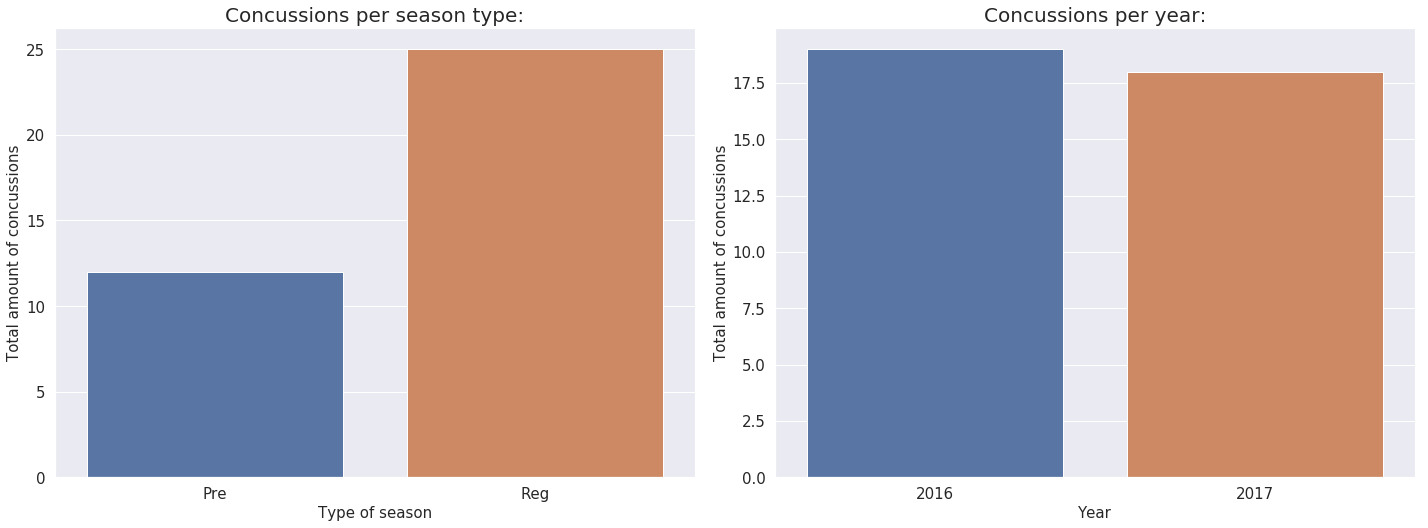

In [114]:
plt.figure(figsize=(20, 7.5))

plt.subplot(1, 2, 1)
_ = sns.countplot(video_footage_injury['Type'])
plt.title('Concussions per season type:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Type of season', fontsize=15)
plt.ylabel('Total amount of concussions', fontsize=15)

plt.subplot(1, 2, 2)
_ = sns.countplot(video_footage_injury['season'])
plt.title('Concussions per year:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total amount of concussions', fontsize=15)

plt.tight_layout()
plt.show()

Clearly, more of the concussions occur during regular season rather than the pre-season and 2016 is showing a slight increase in concussions.

### <a id='video_footage_injury_week'><b>4.3.1 Concussions by week and quarter</b></a>

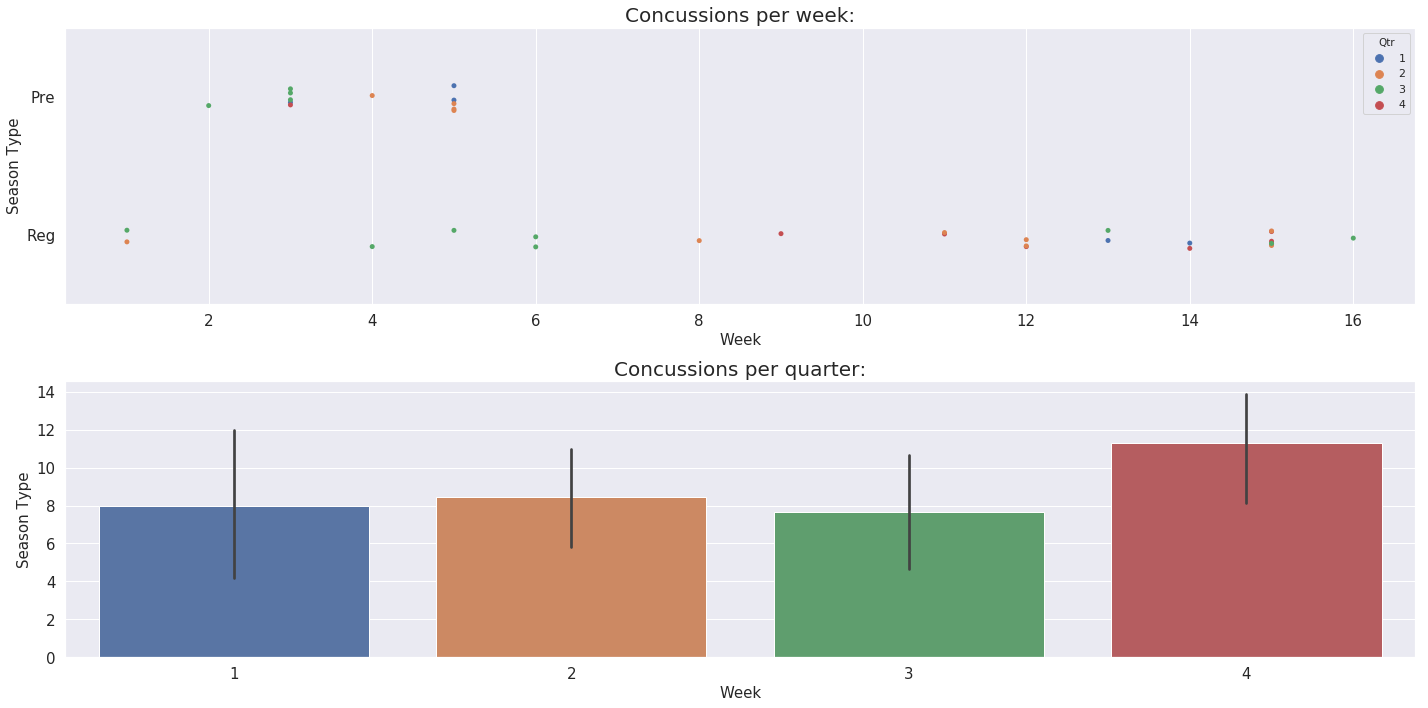

In [116]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
_ = sns.stripplot(x='Week', y='Type', hue='Qtr', data=video_footage_injury)
plt.title('Concussions per week:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Season Type', fontsize=15)

plt.subplot(2, 1, 2)
_ = sns.barplot(x='Qtr', y='Week', data=video_footage_injury)
plt.title('Concussions per quarter:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Season Type', fontsize=15)

plt.tight_layout()
plt.show()

It seems that as the season gets in its final stages, concussions are more prevalent. This can be correlated to teams trying to make it to the playoffs rather than getting eliminated. Also, most concussions occur during the 4th quarter followed by the 2nd quarter. The 1st, 2nd, and 3rd quarters show almost an identical distribution.